<a href="https://colab.research.google.com/github/panimesh14/user-relevance-scoring-model-improved/blob/main/Jan_02_2023_GMM_Model_User_Relevance_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
import scipy as sp
sp.stats.norm.pdf(0.5,loc=0.5,scale=1)

0.3989422804014327

# Data Loading

In [ ]:
details_user =pd.read_csv('user_details_college_company - Sheet2.csv');
details_user.head()

,username,booking_count,gross_earning,core_earning,profile_views,firstbooking,lastbooking,active_days,date_joined,age_in_days,title,description,currenc,followers,company name,company tier numerical,college name,college tier numerical,industry,Industry_numerical,years of experience,# of posts/week,avg engagement per post last 30 days,title.1,user summary,# of Posts last 30 days,# of Comments last 30 days,# of Reactions last 30 days,Gender,gender_score,# of promotional posts
0,anshul0,3107,138633,138293,5813,26-12-2021,22-12-2022,360,20-12-2021,367,Founder @Tech and Target | Helping Students in...,NaN,INR,6705.0,topmate.io,5.0,GLA University,7.0,Software Developer,9.0,5.0,1.166667,13.0,Founder@Tech and Target | Youtuber | 140k+ Sub...,I am a final year undergraduate pursuing Compu...,1.0,0.0,0.0,male,1,1.0
1,PratikShrivastava,1743,31437,31437,323,05-01-2022,24-12-2022,353,23-12-2021,353,10+ Yrs Exp | R&D Specialist at Nokia Networks...,"Hi, This is Pratik Shrivastava here. I have 10...",INR,8619.0,OnlineStudy4U,5.0,ramaiah-institute-of-technology,6.0,Software Developer,9.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,lokesh_bagora,1624,18275,18275,652,10-01-2022,09-10-2022,271,10-01-2022,271,"Mock Interview , Career Guidance , Placement P...","Hello, everyone, I am Lokesh Bagora from Indor...",INR,NaN,Self,5.0,Shivajirao Kadam Institute of Technology and ...,6.0,Software Developer,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,deepika_rajagopal,1585,1782,1782,2800,31-01-2022,31-03-2022,59,31-01-2022,59,IT proffesional | Help aspiring fresher's in c...,Deepika Here !\nI am the content creator of On...,INR,NaN,OnlineStudy4U,5.0,NaN,5.0,Software Developer,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,shreya_gupta,862,9050,9050,3000,01-02-2022,26-03-2022,52,23-02-2022,52,"Mock Interview(All MNCs), Career Guidance, Pla...","Hello, I am Shreya Gupta pursuing my final yea...",INR,1363.0,Ernst & Young Global Consulting Services,8.0,Noida Institute of Engineering & Technology,7.0,User Summary:\nI am a recent college graduate ...,6.0,2.0,0.000000,0.0,Analyst in Ernst and Young,0,0.0,0.0,0.0,female,0,0.0


In [ ]:
details_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   username                              2478 non-null   object 
 1   booking_count                         2478 non-null   int64  
 2   gross_earning                         2478 non-null   int64  
 3   core_earning                          2478 non-null   int64  
 4   profile_views                         2478 non-null   int64  
 5   firstbooking                          2478 non-null   object 
 6   lastbooking                           2478 non-null   object 
 7   active_days                           2478 non-null   int64  
 8   date_joined                           2478 non-null   object 
 9   age_in_days                           2478 non-null   int64  
 10  title                                 1617 non-null   object 
 11  description      

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
details_user.columns

Index(['username', 'booking_count', 'gross_earning', 'core_earning',
       'profile_views', 'firstbooking', 'lastbooking', 'active_days',
       'date_joined', 'age_in_days', 'title', 'description', 'currenc',
       'followers', 'company name', 'company tier numerical', 'college name',
       'college tier numerical', 'industry', 'Industry_numerical',
       'years of experience', '# of posts/week',
       'avg engagement per post last 30 days', 'title.1', 'user summary',
       '# of Posts last 30 days', '# of Comments last 30 days',
       '# of Reactions last 30 days', 'Gender', 'gender_score',
       '# of promotional posts'],
      dtype='object')

### Data Filtering 

In [ ]:
cols_det=['followers', 'company tier numerical', 'college tier numerical', 'years of experience', '# of posts/week', 'avg engagement per post last 30 days', '# of Posts last 30 days', '# of Comments last 30 days', '# of Reactions last 30 days', 'gender_score','# of promotional posts']


In [ ]:
cols_det

['followers',
 'company tier numerical',
 'college tier numerical',
 'years of experience',
 '# of posts/week',
 'avg engagement per post last 30 days',
 '# of Posts last 30 days',
 '# of Comments last 30 days',
 '# of Reactions last 30 days',
 'gender_score',
 '# of promotional posts']

In [ ]:
details_profile_int=details_user[cols_det]

In [ ]:
details_profile_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   followers                             1818 non-null   float64
 1   company tier numerical                1851 non-null   float64
 2   college tier numerical                1916 non-null   float64
 3   years of experience                   1786 non-null   float64
 4   # of posts/week                       1779 non-null   float64
 5   avg engagement per post last 30 days  1779 non-null   float64
 6   # of Posts last 30 days               1779 non-null   float64
 7   # of Comments last 30 days            1779 non-null   float64
 8   # of Reactions last 30 days           1779 non-null   float64
 9   gender_score                          2478 non-null   int64  
 10  # of promotional posts                1779 non-null   float64
dtypes: float64(10), i

details_profile_int.drop(['Industry_numerical'],axis=1,inplace=True)

In [ ]:
details_profile_int.columns

Index(['followers', 'company tier numerical', 'college tier numerical',
       'years of experience', '# of posts/week',
       'avg engagement per post last 30 days', '# of Posts last 30 days',
       '# of Comments last 30 days', '# of Reactions last 30 days',
       'gender_score', '# of promotional posts'],
      dtype='object')

# Exploratory Data Analysis

In [ ]:
details_profile_int['gender_score'].head(7)

0    1
1    1
2    1
3    0
4    0
5    0
6    1
Name: gender_score, dtype: int64

In [ ]:
details_profile_int.isna().nunique()
#followers, company tier numerical, college tier numerical, years of experience, # of posts/week, avg engagement per post last 30 days, # of posts last 30 days, # of Comments last 30 days, # of Reactions last 30 days, Gender, # of promotional posts

followers                               2
company tier numerical                  2
college tier numerical                  2
years of experience                     2
# of posts/week                         2
avg engagement per post last 30 days    2
# of Posts last 30 days                 2
# of Comments last 30 days              2
# of Reactions last 30 days             2
gender_score                            1
# of promotional posts                  2
dtype: int64

In [ ]:
details_profile_int.isnull().sum()

followers                               660
company tier numerical                  627
college tier numerical                  562
years of experience                     692
# of posts/week                         699
avg engagement per post last 30 days    699
# of Posts last 30 days                 699
# of Comments last 30 days              699
# of Reactions last 30 days             699
gender_score                              0
# of promotional posts                  699
dtype: int64

In [ ]:
len(details_profile_int)

2478

In [ ]:
100*details_profile_int.isnull().sum()/len(details_profile_int)

followers                               26.634383
company tier numerical                  25.302663
college tier numerical                  22.679580
years of experience                     27.925747
# of posts/week                         28.208232
avg engagement per post last 30 days    28.208232
# of Posts last 30 days                 28.208232
# of Comments last 30 days              28.208232
# of Reactions last 30 days             28.208232
gender_score                             0.000000
# of promotional posts                  28.208232
dtype: float64

In [ ]:
#Dropping Nans
details_profile_int_dr = details_profile_int.dropna()
len(details_profile_int_dr)

1714

In [ ]:
data_ret = len(details_profile_int_dr)/len(details_profile_int)
data_loss = 1-data_ret
data_loss

0.3083131557707829

def gen_to_bin(x):
    if(x=='male'):
        return 0
    else:
        return 1

details_profile_int_dr['Gender'] = details_profile_int_dr['Gender'].apply(gen_to_bin)
details_profile_int_dr['Gender']

In [ ]:
details_profile_int_dr.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 0 to 2477
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   followers                             1714 non-null   float64
 1   company tier numerical                1714 non-null   float64
 2   college tier numerical                1714 non-null   float64
 3   years of experience                   1714 non-null   float64
 4   # of posts/week                       1714 non-null   float64
 5   avg engagement per post last 30 days  1714 non-null   float64
 6   # of Posts last 30 days               1714 non-null   float64
 7   # of Comments last 30 days            1714 non-null   float64
 8   # of Reactions last 30 days           1714 non-null   float64
 9   gender_score                          1714 non-null   int64  
 10  # of promotional posts                1714 non-null   float64
dtypes: float64(10), i

In [ ]:
#details_profile_int_dr['target_score']=(details_profile_int_dr['core_earning']/(details_profile_int_dr['active_days']+1))
#details_profile_int_dr['target_score'] = sp.stats.norm.cdf(details_profile_int_dr['target_score'],loc=0,scale=1)
#details_profile_int_dr['target_score'].hist(bins=100)
#details_profile_int_dr[details_profile_int_dr['target_score']<0.9]['core_earning'].plot()#hist(bins=100)
#plt.grid()

In [ ]:
from sklearn.mixture import GaussianMixture
#details_profile_int_dr['target_score'] = details_profile_int_dr['target_score']
gm = GaussianMixture(n_components=2).fit(details_profile_int_dr)
details_profile_int_dr['target_score'] = gm.predict(details_profile_int_dr)
details_profile_int_dr['target_score']

<ipython-input-93-f223256a0d0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details_profile_int_dr['target_score'] = gm.predict(details_profile_int_dr)


0       0
4       0
5       0
7       0
8       0
       ..
2462    0
2463    0
2464    0
2465    0
2477    0
Name: target_score, Length: 1714, dtype: int64

In [ ]:
#details_profile_int_dr[details_profile_int_dr['core_earning']<5000]['core_earning'].hist(bins=100)

In [ ]:
#details_profile_int_dr['active_days'].hist(bins=100)

In [ ]:
#details_profile_int_dr['age_in_days'].hist(bins=100)

In [ ]:
#details_profile_int_dr['booking_count'].hist(bins=100)

In [ ]:
#details_profile_int_dr[details_profile_int_dr['booking_count']<400]['booking_count'].hist(bins=100)

In [ ]:
#details_user['profile_views'].hist(bins=100)

In [ ]:
#details_user[details_user['profile_views']<2500]['profile_views'].hist(bins=100)

In [ ]:
details = details_profile_int_dr
details.head()

,followers,company tier numerical,college tier numerical,years of experience,# of posts/week,avg engagement per post last 30 days,# of Posts last 30 days,# of Comments last 30 days,# of Reactions last 30 days,gender_score,# of promotional posts,target_score
0,6705.0,5.0,7.0,5.0,1.166667,13.000000,1.0,0.0,0.0,1,1.0,0
4,1363.0,8.0,7.0,2.0,0.000000,0.000000,0.0,0.0,0.0,0,0.0,0
5,106015.0,9.0,7.0,4.0,13.066667,299.285714,28.0,8.0,12.0,0,25.0,0
7,2552.0,9.0,7.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0.0,0
8,3369.0,9.0,7.0,8.0,0.000000,0.000000,0.0,0.0,0.0,1,0.0,0


In [ ]:
details_profile_int_dr.describe()

,followers,company tier numerical,college tier numerical,years of experience,# of posts/week,avg engagement per post last 30 days,# of Posts last 30 days,# of Comments last 30 days,# of Reactions last 30 days,gender_score,# of promotional posts,target_score
count,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000
mean,10109.089265,8.209452,7.864644,5.116103,1.233619,93.148367,3.075846,1.217036,1.100350,0.806884,1.055426,0.001750
std,25474.115995,1.284377,1.054996,3.986689,2.332667,380.899724,6.438815,2.787603,2.950332,0.394858,2.679377,0.041812
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1649.250000,7.250000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3732.500000,8.000000,8.000000,4.000000,0.245614,9.666667,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,9789.250000,9.000000,9.000000,7.000000,1.400000,56.468750,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,504239.000000,10.000000,10.000000,35.000000,28.000000,9876.000000,65.000000,36.000000,35.000000,1.000000,35.000000,1.000000


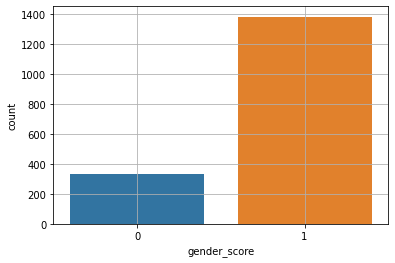

In [ ]:
sns.countplot(x='gender_score',data=details_profile_int_dr)
plt.grid()
#Male:Female~4:1
#Highlights Gender Imbalance in the dataset

In [ ]:
#sns.displot(x='booking_count',data=details_profile_int_dr)
#plt.hist(details_profile_int_dr['booking_count'],bins=50)
#plt.grid()


In [ ]:
#sns.displot(x='booking_count',data=details_profile_int_dr)
#plt.hist(details_profile_int_dr['booking_count'],bins=50)
#plt.grid()


In [ ]:
details_profile_int_dr['followers'].head(10)

0       6705.0
4       1363.0
5     106015.0
7       2552.0
8       3369.0
10     43478.0
11      6502.0
13     12058.0
14     62651.0
15     31978.0
Name: followers, dtype: float64

In [ ]:
details_profile_int_dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 0 to 2477
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   followers                             1714 non-null   float64
 1   company tier numerical                1714 non-null   float64
 2   college tier numerical                1714 non-null   float64
 3   years of experience                   1714 non-null   float64
 4   # of posts/week                       1714 non-null   float64
 5   avg engagement per post last 30 days  1714 non-null   float64
 6   # of Posts last 30 days               1714 non-null   float64
 7   # of Comments last 30 days            1714 non-null   float64
 8   # of Reactions last 30 days           1714 non-null   float64
 9   gender_score                          1714 non-null   int64  
 10  # of promotional posts                1714 non-null   float64
 11  target_score     

In [ ]:
#details_profile_int_dr['followers'] = details_profile_int_dr['followers'].astype('int64')
#details_profile_int_dr['company tier numerical'] = details_profile_int_dr['company tier numerical'].astype('int64')
#details_profile_int_dr['college tier numerical'] = details_profile_int_dr['college tier numerical'].astype('int64')
#details_profile_int_dr['company tier numerical']=details_profile_int_dr['company_tier_numerical'].astype('int64')
details_profile_int_dr['company tier numerical'].dtypes

dtype('float64')

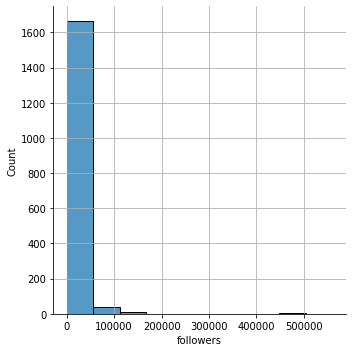

In [ ]:
#plt.hist(details_profile_int_dr['followers'],bins=10)
sns.displot(details_profile_int_dr,x='followers',binwidth=56000,bins=10)
plt.grid()

In [ ]:
details_profile_int_dr.columns

Index(['followers', 'company tier numerical', 'college tier numerical',
       'years of experience', '# of posts/week',
       'avg engagement per post last 30 days', '# of Posts last 30 days',
       '# of Comments last 30 days', '# of Reactions last 30 days',
       'gender_score', '# of promotional posts', 'target_score'],
      dtype='object')

sns.countplot(x='company tier numerical',data=details_profile_int_dr,binwidth=56000,bins=10)
plt.grid()

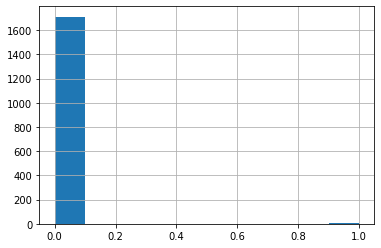

In [ ]:
details_profile_int_dr['target_score'].hist()

<ipython-input-112-186470cb6bf8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details_profile_int_dr[details_profile_int_dr['target_score']>=0.5]['target_score']=1
<ipython-input-112-186470cb6bf8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details_profile_int_dr[details_profile_int_dr['target_score']<0.5]['target_score']=0
<ipython-input-112-186470cb6bf8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

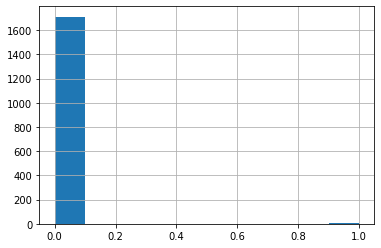

In [ ]:
def targ_to_bin(x):
    t = 0.6;
    if(x<t):
        return 0;
    else:
        return 1;

details_profile_int_dr[details_profile_int_dr['target_score']>=0.5]['target_score']=1
details_profile_int_dr[details_profile_int_dr['target_score']<0.5]['target_score']=0
details_profile_int_dr['target_score'] = details_profile_int_dr['target_score'].apply(targ_to_bin)
details_profile_int_dr['target_score'].hist()

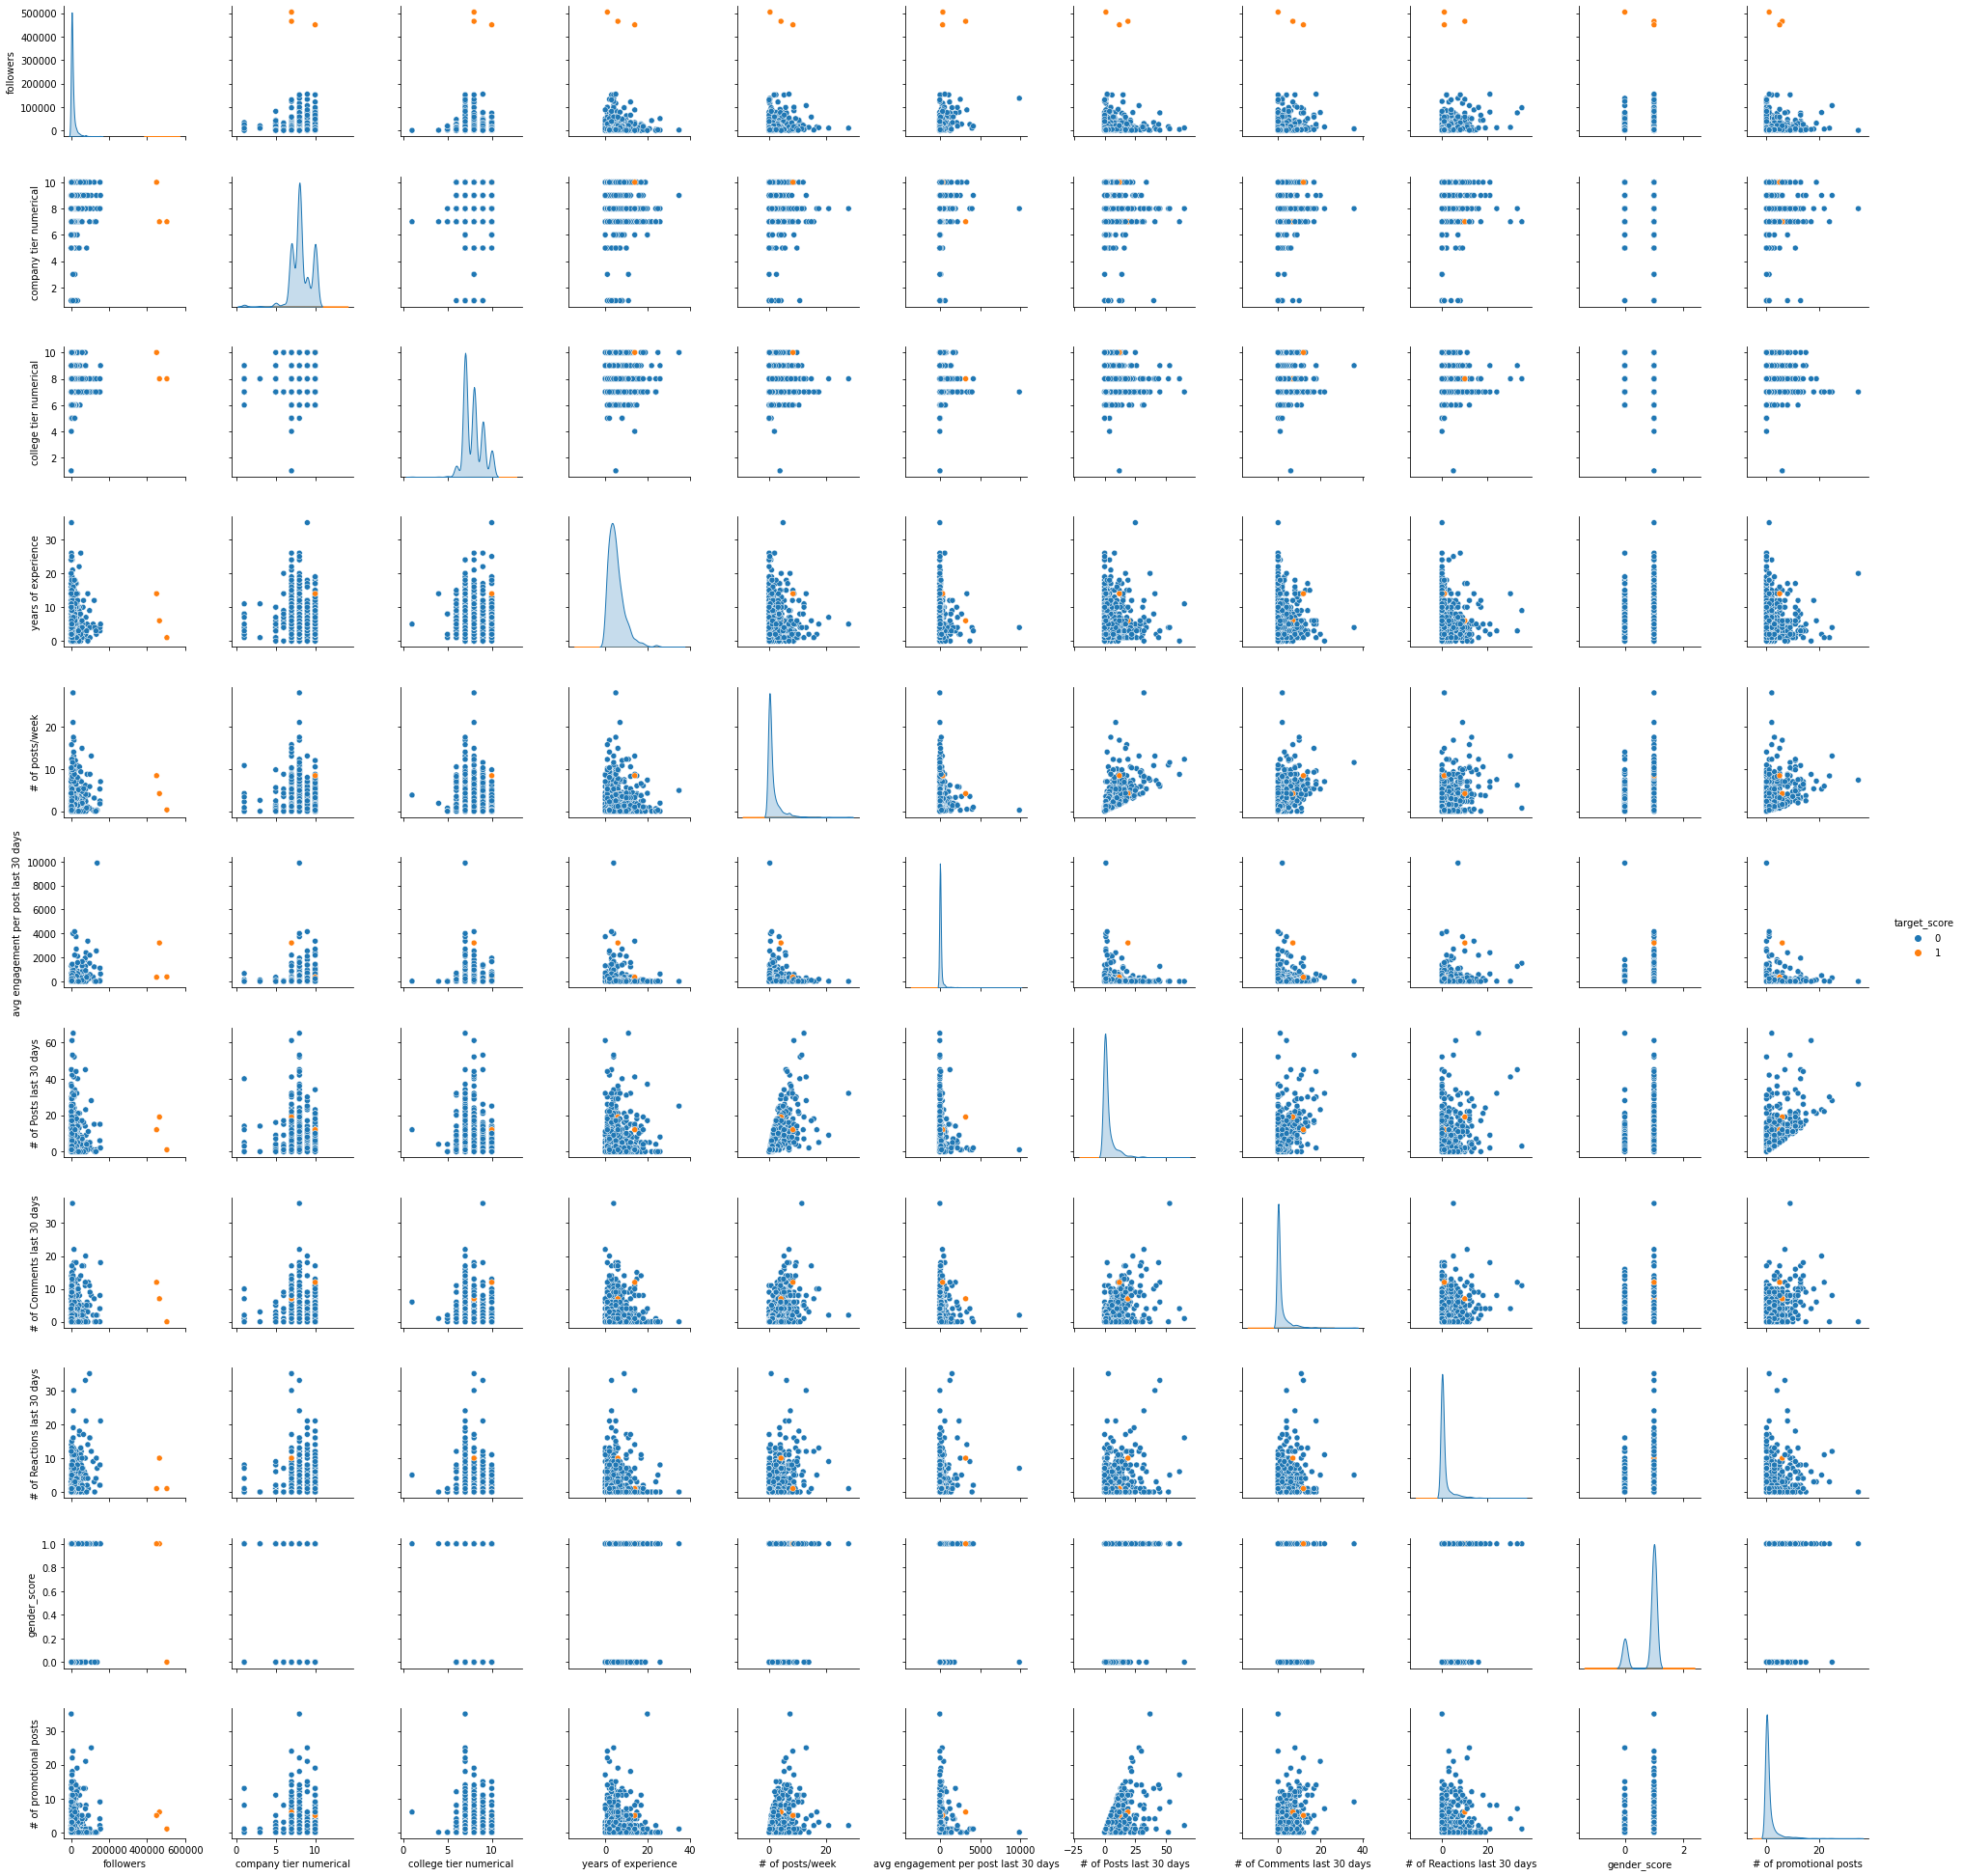

In [ ]:
sns.pairplot(details_profile_int_dr, hue='target_score')

In [ ]:
details_profile_int_dr.to_csv('Actual.csv',index=True)

In [ ]:
#sns.displot(x='booking_count',data=details_profile_int_dr)
#plt.hist(details_profile_int_dr['booking_count'],bins=50)
#plt.grid()


In [ ]:
len(details_profile_int_dr.columns)

12

In [ ]:
details_profile_int_dr['followers'] = details_profile_int_dr['followers'].astype('int64')

<ipython-input-117-2857bd4240f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details_profile_int_dr['followers'] = details_profile_int_dr['followers'].astype('int64')


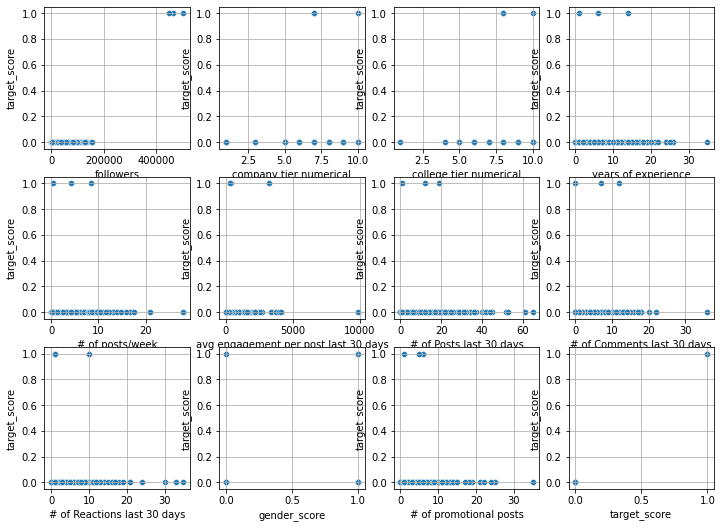

In [ ]:
plt.figure(figsize=(12,12))
i = 1;
for ind in details_profile_int_dr.columns:
    plt.subplot(4,4,i)
    sns.scatterplot(x=ind,y='target_score',data=details_profile_int_dr)
    plt.grid()
    i=i+1;

# Feature Elimination

In [ ]:
X = details_profile_int_dr.drop(['target_score'],axis=1)
y = details_profile_int_dr['target_score']

# Train_Test_Split

In [ ]:
#!python.exe -m pip install --upgrade pip
#!pip install sklearn
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

# Model Building 

In [ ]:
#Importing Models for Majority Vote
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
logreg=LogisticRegression(penalty="l2")
MultiNB=MultinomialNB()
GaussNB=GaussianNB()
BernNB=BernoulliNB()
svc_clf=LinearSVC()
rfc=RandomForestClassifier(n_estimators=100,max_depth=1000)

In [ ]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 754 to 1772
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   followers                             1199 non-null   int64  
 1   company tier numerical                1199 non-null   float64
 2   college tier numerical                1199 non-null   float64
 3   years of experience                   1199 non-null   float64
 4   # of posts/week                       1199 non-null   float64
 5   avg engagement per post last 30 days  1199 non-null   float64
 6   # of Posts last 30 days               1199 non-null   float64
 7   # of Comments last 30 days            1199 non-null   float64
 8   # of Reactions last 30 days           1199 non-null   float64
 9   gender_score                          1199 non-null   int64  
 10  # of promotional posts                1199 non-null   float64
dtypes: float64(9), 

# Model Fitting

In [ ]:
details_profile_int_dr.isnull().sum()

followers                               0
company tier numerical                  0
college tier numerical                  0
years of experience                     0
# of posts/week                         0
avg engagement per post last 30 days    0
# of Posts last 30 days                 0
# of Comments last 30 days              0
# of Reactions last 30 days             0
gender_score                            0
# of promotional posts                  0
target_score                            0
dtype: int64

In [ ]:
logreg.fit(Xtrain,ytrain)
yhat_logreg=logreg.predict(Xtest)

In [ ]:
MultiNB.fit(Xtrain,ytrain)
yhat_MultiNB=MultiNB.predict(Xtest)

In [ ]:
GaussNB.fit(Xtrain,ytrain)
yhat_GaussNB=GaussNB.predict(Xtest)

In [ ]:
BernNB.fit(Xtrain,ytrain)
yhat_BernNB=BernNB.predict(Xtest)

In [ ]:
svc_clf.fit(Xtrain,ytrain)
yhat_svc=svc_clf.predict(Xtest)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
rfc.fit(Xtrain,ytrain)
yhat_rfc=rfc.predict(Xtest)

# Model Evaluation and Testing

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#Logistic Regression 
print("Logistic Regression")
print(classification_report(ytest,yhat_logreg))

##Multinomial Naive Bayes
print("Multinomial Naive Bayes")
print(classification_report(ytest,yhat_MultiNB))

#Gaussian Naive Bayes
print("Gaussian Naive Bayes")
print(classification_report(ytest,yhat_GaussNB))
#Gausaian Naive Bayes Model displays poor recall on the data and results in only ~50-55% accuracy overall.
#f1 score suggests overall performance

#Bernoulli Naive Bayes
print("Bernoulli Naive Bayes")
print(classification_report(ytest,yhat_BernNB))
#Despite simplicity of Bernoulli trials, it shows a good performance overall

#Support Vector Machine
print("Support Vector Machine")
print(classification_report(ytest,yhat_svc))

#Random Forest Classifier
print("Random Forest Classifier")
print(classification_report(ytest,yhat_rfc))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       514
           1       1.00      1.00      1.00         1

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515

Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       514
           1       0.00      0.00      0.00         1

    accuracy                           0.85       515
   macro avg       0.50      0.43      0.46       515
weighted avg       1.00      0.85      0.92       515

Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       514
           1       0.00      0.00      0.00         1

    accuracy                           1.00       515
   macro avg       0.50      0.50      0.50       515
weighted 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

# Ensemble Model- Majority Voting Model

In [ ]:
#Majority Vote Class
from scipy.stats import mode
class MajorityVote:
    def __init__(self,*classifiers):
        self.classifier=classifiers;

    def predict(self,sample,confidence=False):
        vote=[];
        for clf in self.classifier:
            plabel=clf.predict(sample)
            vote.append(plabel)
        if(confidence):
           maj_vote_count=mode(vote)[1];            
           conf=(maj_vote_count/len(vote))*100;
           return mode(vote)[0], conf        
        else:
            return mode(vote)[0]
vote_combined_clf=MajorityVote(logreg,MultiNB,BernNB,svc_clf,rfc);

In [ ]:
yhat_mvote= (vote_combined_clf.predict(Xtest)).T
print(yhat_mvote[5:10])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
print(classification_report(ytest,yhat_mvote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       514
           1       0.00      0.00      0.00         1

    accuracy                           1.00       515
   macro avg       0.50      0.50      0.50       515
weighted avg       1.00      1.00      1.00       515



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
new_file='';
details_user=pd.read_csv(new_file);
det_cols=['booking_count', 'age_in_days','core_earning','active_days', 'followers', 'company tier numerical', 'college tier numerical', 'years of experience', '# of posts/week', 'avg engagement per post last 30 days', '# of Posts last 30 days', '# of Comments last 30 days', '# of Reactions last 30 days', 'gender_score','# of promotional posts']
pd=details_user[det_cols]#profile details
X = details_profile_int_dr
#y = details_profile_int_dr['target_score']
y_pred = vote_combined_clf.predict(X)

FileNotFoundError: ignored